<a href="https://colab.research.google.com/github/Iguta/ZTM-DeepLearningWithPyTorch/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [8]:
x = np.arange(1, 10)
y = x * 3 + 4
fig = px.line(
 x,
 y
)
fig.update_layout(
    height=400
)
fig.show()


### Data -> Preparing and Loading

In [9]:
#create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02

# #random seed
# RANDOM_SEED = 101
# torch.manual_seed(RANDOM_SEED)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
len(X), len(y)

(50, 50)

### Splitting data

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [12]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [13]:
X_train.squeeze()
y_train

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])

In [14]:
None == True

False

In [15]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None
                     ):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(8, 5))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #plot the predictions if they exist
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  #show the legende
  plt.legend(prop={"size":14})

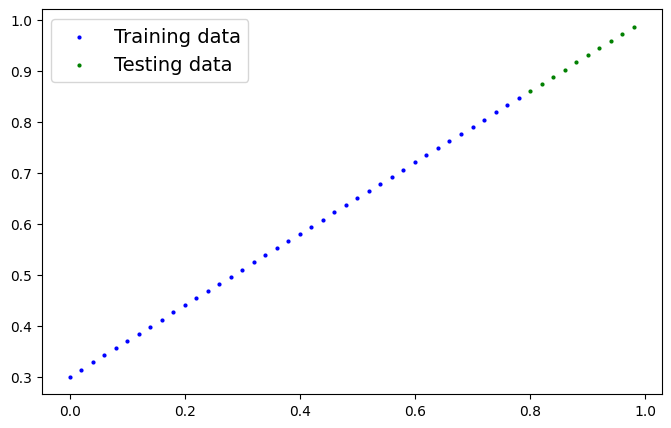

In [16]:
plot_predictions()

What our model does:
 * Start with random values
 * Look at the training data and adjust the random values (the weight and bias) values that we used to create the data.

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [17]:
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula


In [18]:
#checking the contents of our model
# RANDOM_SEED = 42
# torch.manual_seed(RANDOM_SEED)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.4740], requires_grad=True),
 Parameter containing:
 tensor([0.1978], requires_grad=True)]

In [19]:
model.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))]),
 0.7,
 0.3)

In [20]:
#making predictions
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.5770],
        [0.5865],
        [0.5960],
        [0.6055],
        [0.6149],
        [0.6244],
        [0.6339],
        [0.6434],
        [0.6529],
        [0.6623]])

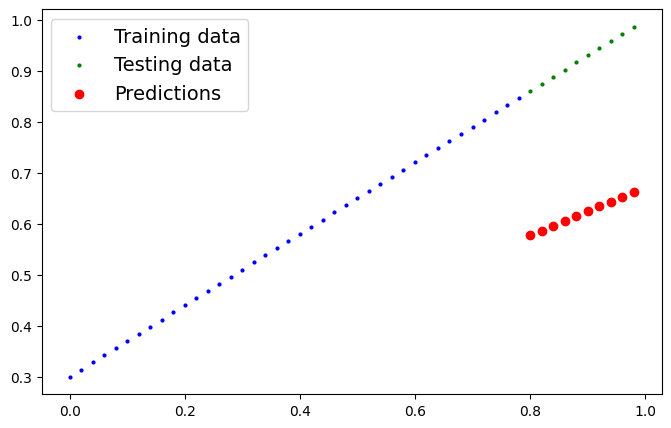

In [21]:
plot_predictions(predictions=y_preds)

In [22]:
# Train the Model
#loss function ->  Mean Absolute Error
loss_fn = nn.L1Loss()
loss_fn

#optimizer -> setup an optimizer (stochastic gradient descent)
optimizer =  torch.optim.SGD(params = model.parameters(),
                             lr=0.01) #lr = learning rate

### Building a training loop & testing loop
1. Loop through the data
2. Forward propagation/pass
3. Calculate the loss (compare foward pass predictions and ground truth labels)
4. Optimizer zero grad
5. Loss backward -> **backpropagation**.
6. Optimizers step - use the optimizer to improve the loss function.(**gradient descent**)

In [23]:
epochs = 200 # -> hyperparameter
train_loss_hist = []
test_loss_hist = []
def training():
  #one loop through the whole data

  for epoch in range(epochs):
    #set the model to training mode
    model.train() #train

    #1. forward pass
    y_pred = model(X_train)

    #2. Calculate the loss
    train_loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss with resepect to the parameters of the model
    train_loss.backward()

    #5 Perform optimizer (perform gradient descent)
    optimizer.step()

    #6 Testing
    model.eval() #turns off some settings we don't want e.g dropout and batchnorm
    with torch.inference_mode(): #turns off gradient tracking
      #forward pass
      test_pred = model(X_test)
      #calculate the loss
      test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss} Test Loss: {test_loss}| ")
      #track test loss and train loss -> after 10 epochs
      train_loss_hist.append(train_loss.item())
      test_loss_hist.append(test_loss.item())



In [24]:
training()

Epoch: 0 | Loss: 0.19033773243427277 Test Loss: 0.28984665870666504| 
Epoch: 10 | Loss: 0.07512777298688889 Test Loss: 0.15513677895069122| 
Epoch: 20 | Loss: 0.031207114458084106 Test Loss: 0.08125631511211395| 
Epoch: 30 | Loss: 0.026496153324842453 Test Loss: 0.06282292306423187| 
Epoch: 40 | Loss: 0.023029420524835587 Test Loss: 0.053176604211330414| 
Epoch: 50 | Loss: 0.019592951983213425 Test Loss: 0.04490407183766365| 
Epoch: 60 | Loss: 0.016155926510691643 Test Loss: 0.03731842711567879| 
Epoch: 70 | Loss: 0.012727485969662666 Test Loss: 0.029045861214399338| 
Epoch: 80 | Loss: 0.009289328940212727 Test Loss: 0.020773321390151978| 
Epoch: 90 | Loss: 0.005853992886841297 Test Loss: 0.013187664560973644| 
Epoch: 100 | Loss: 0.002427954226732254 Test Loss: 0.004237157292664051| 
Epoch: 110 | Loss: 0.00789039209485054 Test Loss: 0.0008656919235363603| 
Epoch: 120 | Loss: 0.00789039209485054 Test Loss: 0.0008656919235363603| 
Epoch: 130 | Loss: 0.00789039209485054 Test Loss: 0.00086

In [25]:
with torch.inference_mode():
  y_preds = model(X_test)

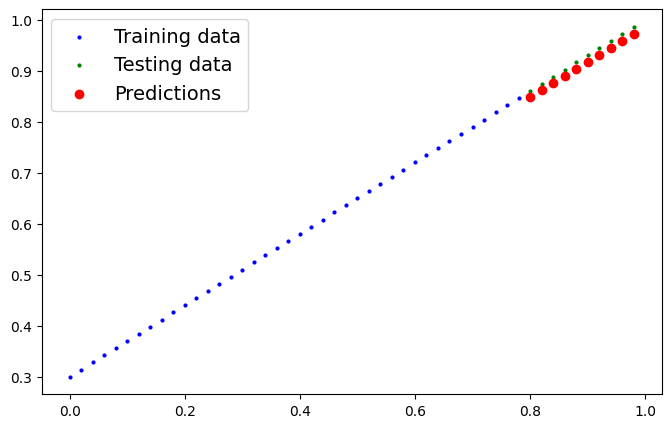

In [26]:
plot_predictions(predictions=y_preds)

In [27]:
model.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.6906])), ('bias', tensor([0.2958]))]),
 0.7,
 0.3)

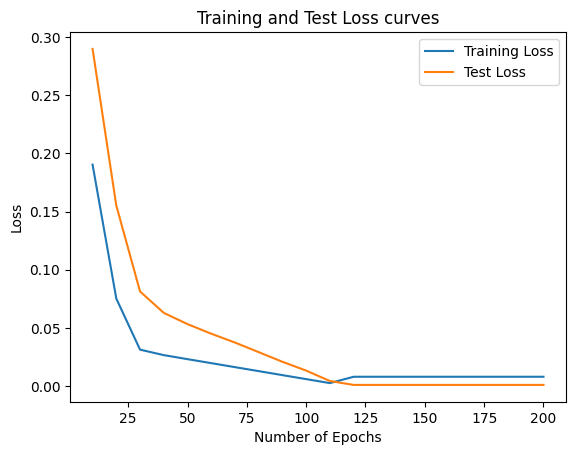

In [28]:
plt.plot(range(10, epochs+1, 10),
         train_loss_hist,
         label="Training Loss")
plt.plot(range(10, epochs+1, 10),
         test_loss_hist,
         label="Test Loss")
plt.legend()
plt.title("Training and Test Loss curves")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

## Using Shallow Machine Learning Methods


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lm.predict(X_test)

In [34]:
print(len(X_train), len( y_train))
print(len(X_test), len(y_test), len(y_pred))

35 35
15 15 15


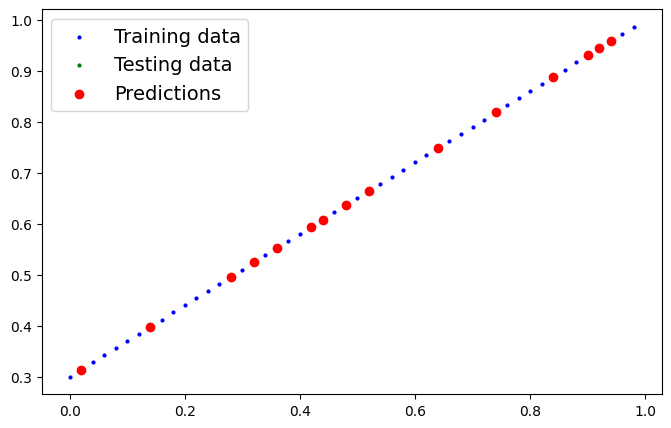

In [35]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_pred)

### Saving a Model

In [36]:
from pathlib import Path

In [37]:
#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [38]:
MODEL_NAME ="pytorch-workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# print(MODEL_SAVE_PATH)

#Save the model
torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [39]:
loaded_model =  LinearRegressionModel()
loaded_model.state_dict()

OrderedDict([('weights', tensor([1.1561])), ('bias', tensor([0.3965]))])

In [40]:
load_state_dict = torch.load(MODEL_SAVE_PATH)
loaded_model.load_state_dict(load_state_dict)

<All keys matched successfully>

In [41]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6906])), ('bias', tensor([0.2958]))])

## Putting it all together

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#check version
torch.__version__

'2.6.0+cu124'

In [43]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Data

In [44]:
#create some data using linear regression formula
# y = mx + c
# y = weight * X  + bias

weight = 0.8
bias = -0.3

# create rannge values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

In [45]:
X.ndim
y

tensor([[-0.3000],
        [-0.2840],
        [-0.2680],
        [-0.2520],
        [-0.2360],
        [-0.2200],
        [-0.2040],
        [-0.1880],
        [-0.1720],
        [-0.1560],
        [-0.1400],
        [-0.1240],
        [-0.1080],
        [-0.0920],
        [-0.0760],
        [-0.0600],
        [-0.0440],
        [-0.0280],
        [-0.0120],
        [ 0.0040],
        [ 0.0200],
        [ 0.0360],
        [ 0.0520],
        [ 0.0680],
        [ 0.0840],
        [ 0.1000],
        [ 0.1160],
        [ 0.1320],
        [ 0.1480],
        [ 0.1640],
        [ 0.1800],
        [ 0.1960],
        [ 0.2120],
        [ 0.2280],
        [ 0.2440],
        [ 0.2600],
        [ 0.2760],
        [ 0.2920],
        [ 0.3080],
        [ 0.3240],
        [ 0.3400],
        [ 0.3560],
        [ 0.3720],
        [ 0.3880],
        [ 0.4040],
        [ 0.4200],
        [ 0.4360],
        [ 0.4520],
        [ 0.4680],
        [ 0.4840]])

In [46]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Split the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([35, 1]),
 torch.Size([35, 1]),
 torch.Size([15, 1]),
 torch.Size([15, 1]))

### Plot the data

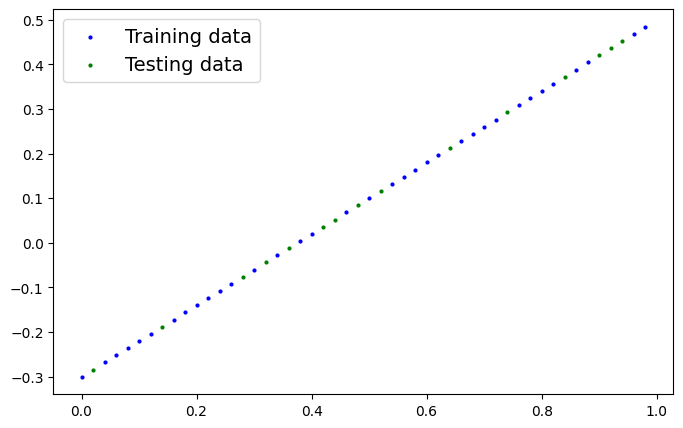

In [49]:
plot_predictions(X_train, y_train, X_test, y_test)

### Pytorch Workflow

In [50]:
torch.randn(1)

tensor([-2.4661])

In [51]:
import torch
from torch import nn
class LinearRegressionModelV2(nn.Module):
 #create parameters
  def __init__(self):
    super().__init__()

  #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [52]:
#set the manual seed
torch.manual_seed(42)
modelV2 = LinearRegressionModelV2()
modelV2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training and Evaluation


In [53]:
#check the model current device
next(modelV2.parameters()).device

device(type='cpu')

In [54]:
#set the model to use target device
modelV2.to(device)
next(modelV2.parameters()).device

device(type='cuda', index=0)

In [55]:
def train(X_train, y_train, X_test, y_test):
  #loss function
  loss_fn = nn.L1Loss()

  #track training and test loss
  train_loss_hist = []
  test_loss_hist = []

  #optimizer
  optimizer = torch.optim.SGD(params=modelV2.parameters(), lr=0.01)

  # number of epochs
  epochs = 200
  #training loop

  #put data on to the target device
  # device agnostic code for data
  X_train = X_train.to(device)
  y_train = y_train.to(device)
  X_test = X_test.to(device)
  y_test = y_test.to(device)

  # print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


  for epoch in range(1, epochs+1):
    #1 -> set our model to train mode
    modelV2.train()

    #2 -> forward pass
    y_pred = modelV2(X_train)

    #3 -> calculate the training loss
    loss = loss_fn(y_pred, y_train)

    #4 -> optimizer zero grad
    optimizer.zero_grad()

    #5 -> perform backpropagation to evaluate the gradients
    loss.backward()

    #6 -> Optimizer step
    optimizer.step()

    #testing
    modelV2.eval()
    with torch.inference_mode():
      test_pred = modelV2(X_test)

      test_loss = loss_fn(test_pred, y_test)

      #append train and test loss
      train_loss_hist.append(loss.item())
      test_loss_hist.append(test_loss.item())

      #print what is happening
      if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss : {test_loss}")

  return train_loss_hist, test_loss_hist


In [56]:
train_loss, test_loss = train(X_train, y_train, X_test, y_test)

Epoch: 10 | Loss: 1.0031508207321167 | Test Loss : 0.986112117767334
Epoch: 20 | Loss: 0.8808186650276184 | Test Loss : 0.8610345721244812
Epoch: 30 | Loss: 0.7584865093231201 | Test Loss : 0.7359569668769836
Epoch: 40 | Loss: 0.636154294013977 | Test Loss : 0.6108793616294861
Epoch: 50 | Loss: 0.5138221383094788 | Test Loss : 0.4858017563819885
Epoch: 60 | Loss: 0.3914898633956909 | Test Loss : 0.3607240319252014
Epoch: 70 | Loss: 0.26915737986564636 | Test Loss : 0.23564615845680237
Epoch: 80 | Loss: 0.15974949300289154 | Test Loss : 0.13658128678798676
Epoch: 90 | Loss: 0.12172440439462662 | Test Loss : 0.11345743387937546
Epoch: 100 | Loss: 0.1104266569018364 | Test Loss : 0.10439378768205643
Epoch: 110 | Loss: 0.10386430472135544 | Test Loss : 0.09838387370109558
Epoch: 120 | Loss: 0.09862451255321503 | Test Loss : 0.09314198791980743
Epoch: 130 | Loss: 0.09343352913856506 | Test Loss : 0.08804333209991455
Epoch: 140 | Loss: 0.0883316621184349 | Test Loss : 0.0832311362028122
Epoc

In [57]:
modelV2.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.5790]], device='cuda:0')),
              ('linear_layer.bias', tensor([-0.1763], device='cuda:0'))]),
 0.8,
 -0.3)

### Plot training and test loss


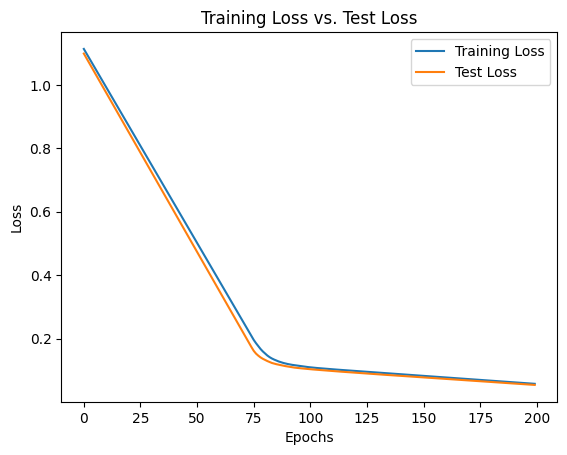

In [58]:
plt.plot(train_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss")
plt.legend()
plt.title("Training Loss vs. Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Evaluate the model

In [59]:
modelV2.eval()
with torch.inference_mode():
  y_labels = modelV2(X_test.to(device))

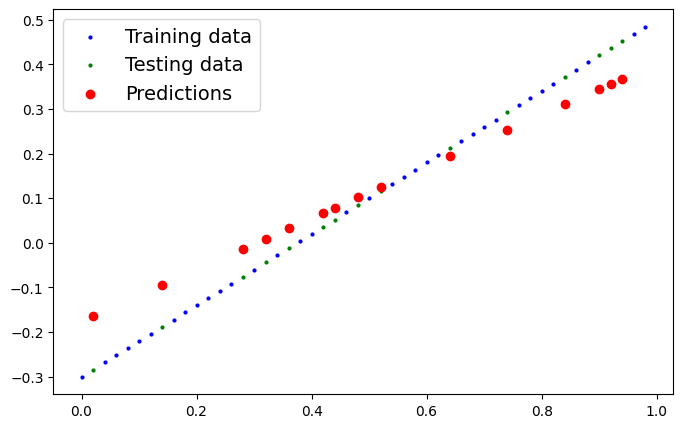

In [60]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_labels.cpu())

In [61]:
#make prediction
modelV2(torch.tensor(20).unsqueeze(dim=0).to(device).type(torch.float)).item()

11.403183937072754

In [62]:
weight, bias

(0.8, -0.3)

### Saving and Loading the model

In [63]:
from pathlib import Path
#create model path
MODEL_PATH = Path("models")


#create model save path
MODEL_NAME = "01_pytorch.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



#Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(modelV2.state_dict(), MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch.pth


In [65]:
#loading the model
loaded_model = LinearRegressionModelV2()

In [66]:
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [67]:
loaded_model.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [70]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [71]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5790]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.1763], device='cuda:0'))])

In [78]:
# Evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test.to(device))
y_labels == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')